## Deep Neural Network Sequential Model On Mnist Digits Dataset

### MNIST digits image dataset

##### About Dataset

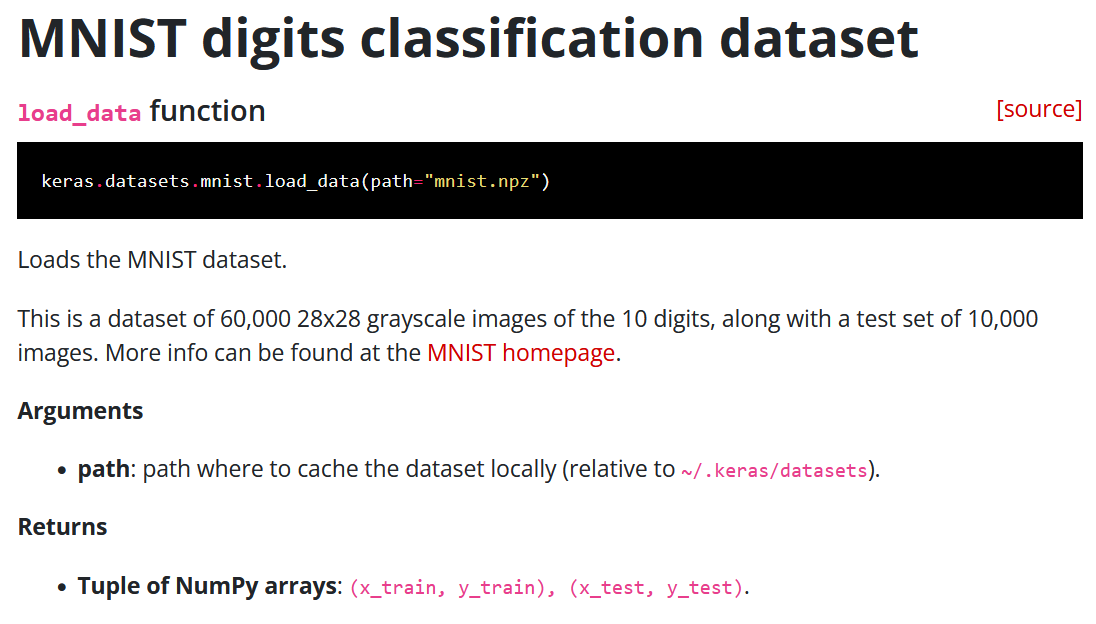

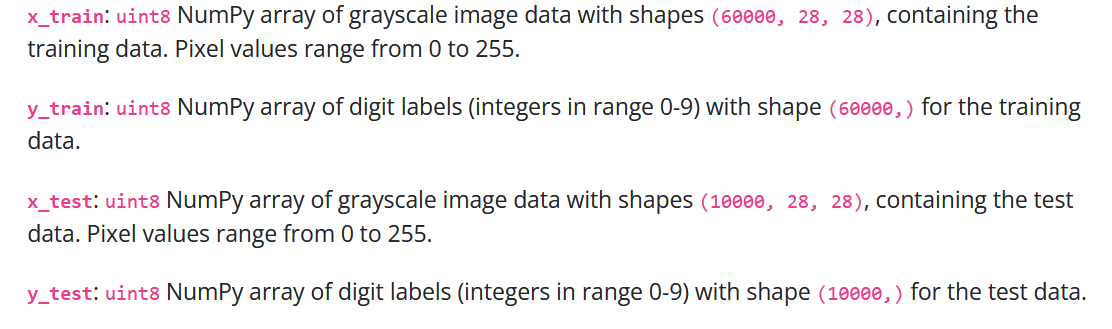

The **MNIST** dataset stands for **Modified National Institute of Standards and Technology**. It is a collection of handwritten digits, commonly used to train and test machine learning models, especially in the field of deep learning. Here’s a simple breakdown:

1. **What is in the dataset?**
   - MNIST contains 70,000 images of handwritten digits from 0 to 9.
   - These images are in **grayscale** (black and white), each with a size of **28x28 pixels**. So, each image is like a small grid of numbers (0-255, representing pixel intensity).
   
2. **How is it organized?**
   - The dataset is split into two parts:
     - **Training set**: 60,000 images, used to train a machine learning model.
     - **Test set**: 10,000 images, used to test the model and check its performance after training.
   
3. **What are the labels?**
   - Each image is labeled with the correct digit (from 0 to 9), so your model learns to associate an image with a particular number. For example, an image of a handwritten "3" is labeled as "3".

4. **What is it used for?**
   - MNIST is often used to test the effectiveness of machine learning models, particularly models that perform image classification (i.e., determining which digit is in the image).
   - It’s great for beginners because the dataset is relatively simple and small compared to other image datasets.

5. **Why is it popular?**
   - It's one of the most famous datasets in machine learning and deep learning.
   - It’s easy to work with and provides a good starting point for learning how to train models to recognize images.

So, in your case, you’re building a **Multilayer Perceptron (MLP)**, which is a type of neural network model. You’ll use MNIST to teach the MLP how to recognize handwritten digits.

Let me know if you'd like help with the next steps, like preparing the data or building the model!

#### Import Basic Packages of DL

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , Flatten
from keras import Sequential

In [23]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset from keras (Its inbuilt)

In [24]:
df = keras.datasets.mnist.load_data()

In [25]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### To split MNIST into train and test:
#### Training Data (60,000 images):
##### 60,000 image vectors (each of size 784) (28 * 28)
##### 60,000 labels (each is a number between 0 and 9)
#### Test Data (10,000 images):
##### 10,000 image vectors (each of size 784)  (28 * 28)
##### 10,000 labels (each is a number between 0 and 9)

##### Here split the data into training and testing in that way where training data as well as there image size is also there (60000 , 28 , 28) and (10000 , 28 , 28)

#### split the data into train input and output test input and output

In [26]:
(x_train , y_train) , (x_test , y_test) = df

In [27]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


#### Inisghts : split the data as per given

##### insights : 60000 images for training and 10000 images for testing

### Q. Why we are not split data into feature and target variable ?

when we load the **MNIST** dataset, we don't explicitly split the data into **input** and **output variables** (often referred to as **features** and **labels** in machine learning).

### Explanation:

When you load the MNIST dataset using Keras, it's already pre-split into input and output:

- **Input (features)**: These are the **images** themselves, which are represented as 2D arrays (28x28 pixels) or, after flattening, as 1D arrays (784 pixels).
- **Output (labels)**: These are the **digit labels** (0–9) that correspond to each image.

Here’s how it works step-by-step when you load the data with `mnist.load_data()`:

```python
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train contains the image data (features, 60,000 images)
# y_train contains the labels (0-9, corresponding to each image)
# x_test contains the test images (10,000 images)
# y_test contains the test labels (0-9)
```

#### Breakdown:
1. **`x_train`**: This variable contains the **images** in the training set. Each image is a 28x28 pixel array (or 784 pixel values if you flatten it). These are your **input features**.
   
2. **`y_train`**: This variable contains the **labels** for the images in the training set. These are the corresponding digits (0-9) for each image. These are your **output labels** (or target values).

3. **`x_test`**: This variable contains the test images. After training your model on `x_train`, you use `x_test` to evaluate how well your model generalizes to new data.

4. **`y_test`**: This variable contains the labels for the test images, which is used to compare the model's predictions against the actual labels to see how well it performs.

---

### Why Don’t We Need to Split the Data Again?
The dataset is already **pre-split** for you into two parts: 
- One for training (`x_train`, `y_train`).
- One for testing (`x_test`, `y_test`).

The data that you're interested in (the **input** and the **output**) is already divided into the proper format when you load it with `mnist.load_data()`. Therefore, there's no need to split the dataset manually unless you want to:

- **Create a validation set** from the training data (for hyperparameter tuning, model selection, etc.).
- **Randomize or shuffle** the data (although Keras handles this internally when training models).

---

### If You Want to Split Further (For Example, to Create a Validation Set):
If you'd like to create a **validation set** from the training data (e.g., to monitor performance while tuning the model), you can use `train_test_split` from `sklearn` or use Keras' built-in validation mechanisms.

For example, you could use **`train_test_split`** to further split the training data into training and validation sets:

```python
from sklearn.model_selection import train_test_split

# Split the training data into a smaller training set and validation set
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Now, you have:
# - x_train_new, y_train_new for training the model
# - x_val, y_val for validation during training
```

This will give you:
- `x_train_new` and `y_train_new` for training the model.
- `x_val` and `y_val` for evaluating the model during training (validation set).

### Summing Up:
- When you load the **MNIST** dataset using Keras, the data is already split into **input** (`x_train`, `x_test`) and **output** (`y_train`, `y_test`).
- There's no need to manually separate the features (inputs) and labels (outputs) because Keras provides them already split.
- If you want to further split the data (e.g., for validation), you can do that after loading the data.

Let me know if you'd like more examples or clarification on how to handle splitting and validation!

#### we want check how digits images look like

##### Import package for visualizing images

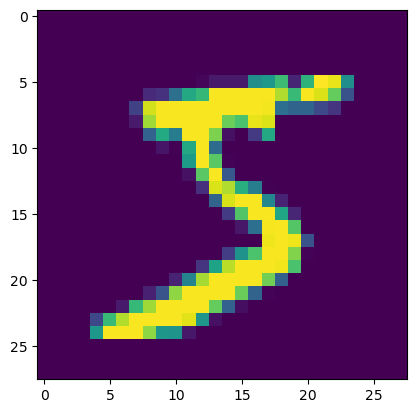

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

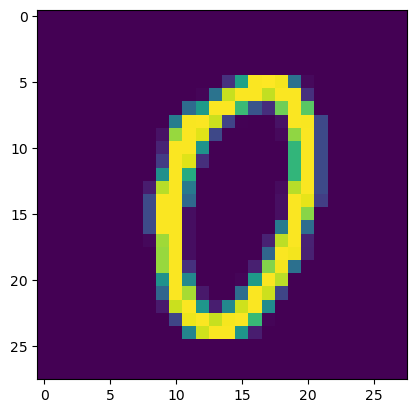

In [29]:
plt.imshow(x_train[1000])
plt.show()

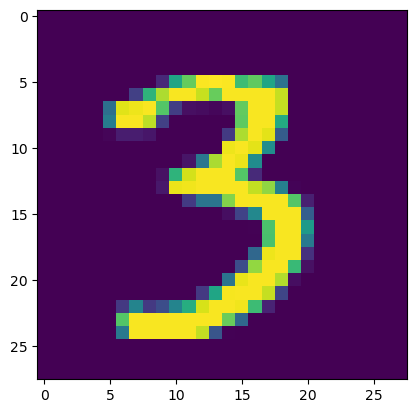

In [30]:
plt.imshow(x_train[10000])
plt.show()

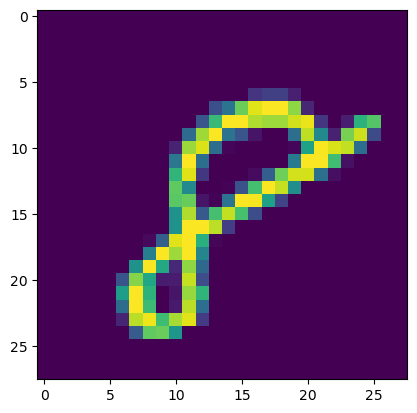

In [31]:
plt.imshow(x_train[59999])
plt.show()

#### Performing Feature Scaling ( Its mandetory step)

#### In image dataset , we always doing feature scaling by normalization only

#### Because image exist between 0 to 255 . so when 0/255 is 0 and 255 / 255 then 1 only. so data exist between 0 to 1 only 

In [32]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Insights : Data get scaled. (by divide 255 only) Data get exist between 0 to 1 only.

#### Visualization of multiple images of training

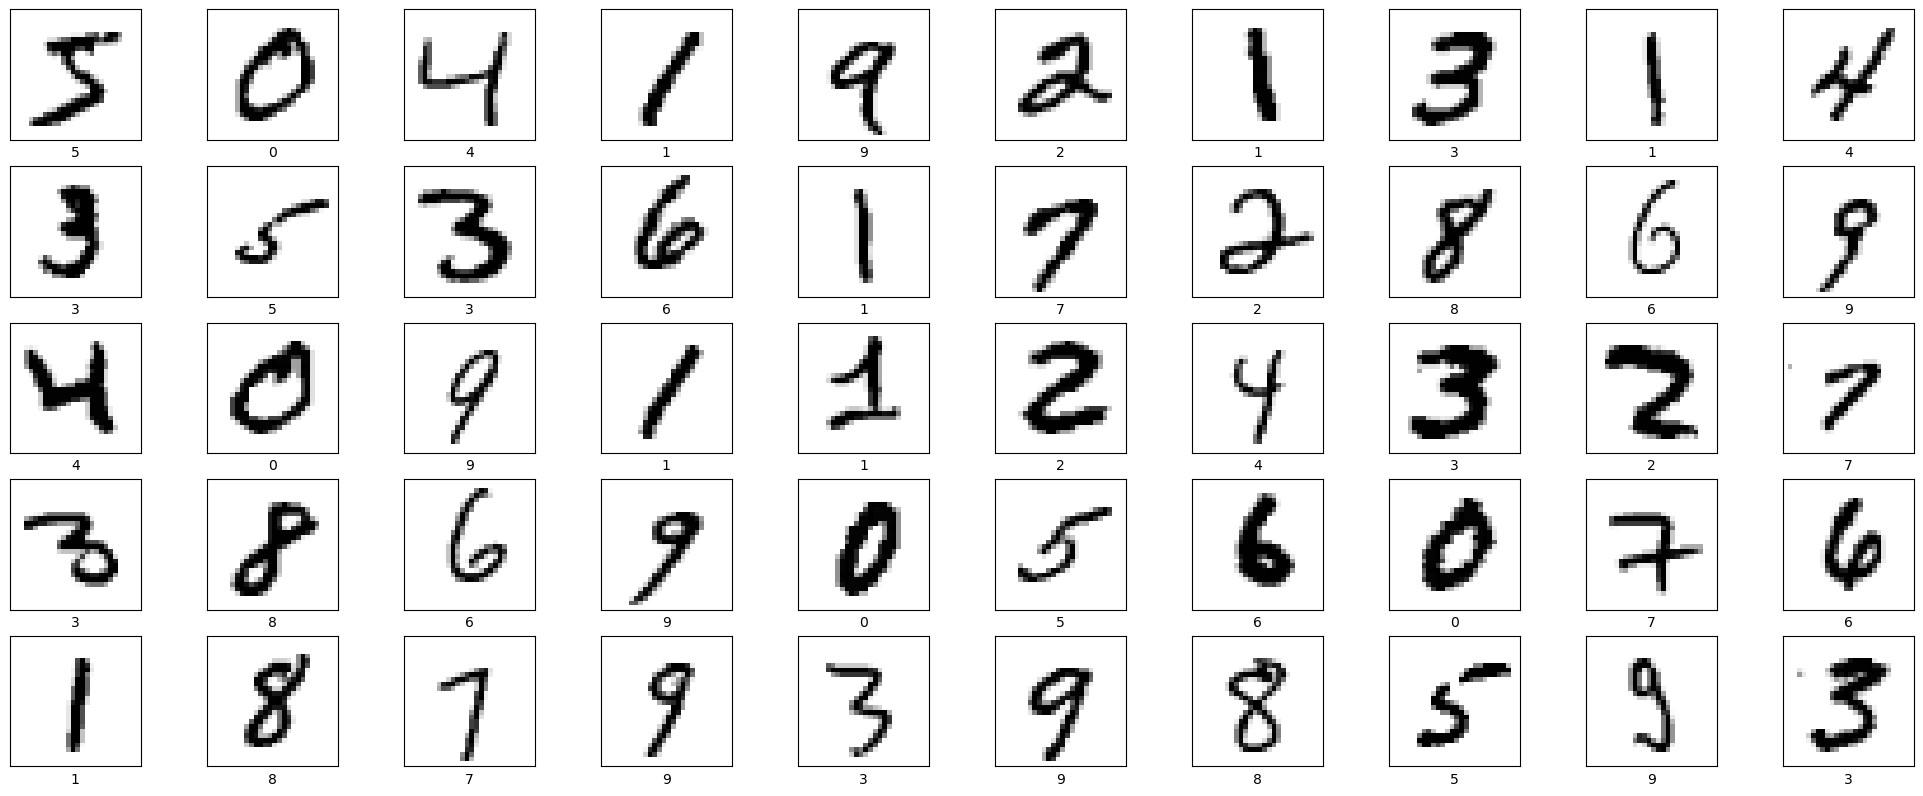

In [33]:
plt.figure(figsize = (25 , 20))
for image in range(50):
    
    plt.subplot(5 , 10 , image + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image] , cmap = plt.cm.binary)
    plt.xlabel(y_train[image])
plt.show()

#### Visualizing multiple images of testing

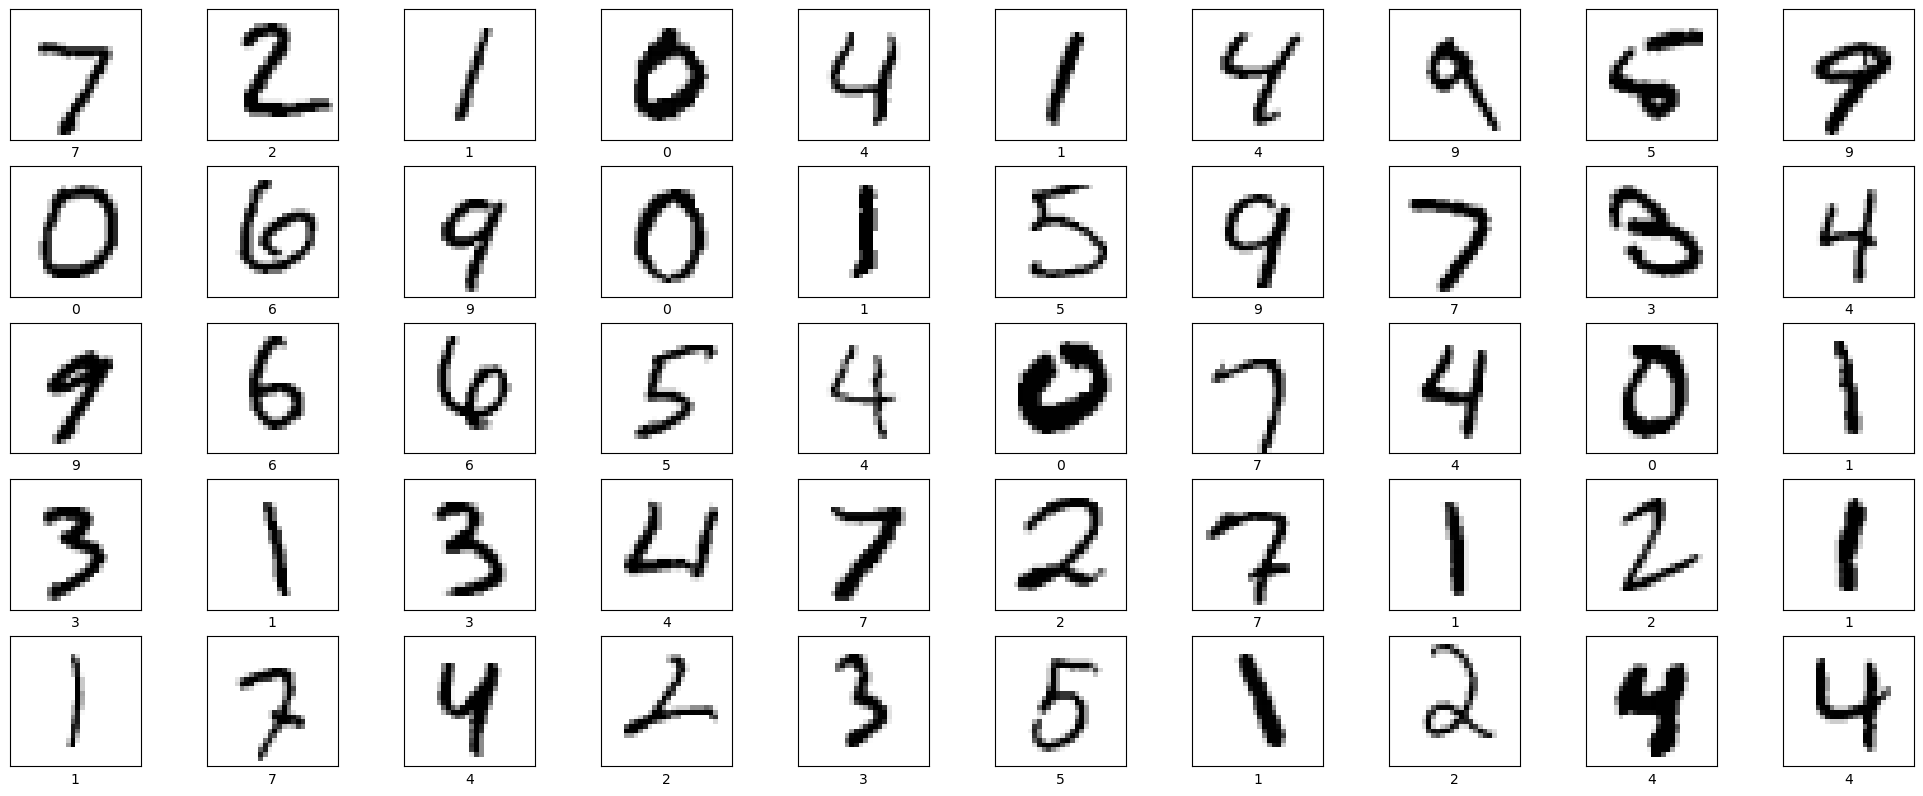

In [34]:
plt.figure(figsize = (25 , 20))

for image in range(50):
    
    plt.subplot(5 , 10 , image + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[image] , cmap = plt.cm.binary)
    plt.xlabel(y_test[image])
    
plt.show()

### Building Multi Layer Preceptron 

#### When image data only preprocess technique is do that is scaling . (Normalise the data)

##### Multilayer perceptron means more than one neuron

#### Multilayer Perceptron model by sequential architecture

In [35]:
model = Sequential()

#### Before that we need to convert that images data into one Dimension only

#### It convert metrics to vector (from 2d to 1d) (2d because here 28 rows and 28 columns are)

In [36]:
model.add(Flatten(input_shape = (28 , 28)))   # this code is just for reduce dimensationality of i/p_dim

#### It take input data is in 2D (28 * 28) means 28 rows and 28 columns of each image . so our input is (28 * 28) so thats why give value as (28 * 28)  and we enclose into flatten . so it became 784 columns (vector)

#### It take input data as shape of images and get convert into 1D

#### After converting in 1D then data is 28 * 28 = 784

#### Input value for sequential model is 784 and output(neuron) is  128

#### 1st fully connected hidden layer

In [37]:
model.add(Dense(units = 128 ,  activation = 'relu'))   # this is actual code of 1st hidden layer

#### Why No input_dim in the First Dense Layer?
##### In a neural network, the input shape (or input dimensions) tells the model what size the data will be when it is passed through the network.

##### When you use the Flatten layer, you are effectively reshaping the data into a 1D vector (flattening a 
##### 28×28 image into a vector of size 784). This reshaped 1D vector is automatically passed to the next layer.



#### Fully connected 2nd hidden layer

In [38]:
model.add(Dense(units = 32 , activation = 'relu'))

##### Always give less than or equals to neurons in current layer as compare to previous neurons (layer) . like in 1st hidden layer 128 neurons and in 2nd hidden layer give less than or equals to previous hidden layer like here 32 gave. the reason is to avoid overfirring

#### Output Layer

In [39]:
model.add(Dense(units = 10 , activation = 'softmax'))

##### Architecture operation parameters

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model

##### Compile  is for setting loss fun as well as performance evaluation matrix and optimizer for improving performance of model very fast

In [41]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

##### Insights : For loss , if problem is binary classification then binary_crossentropy
##### multiclass classification then categorical_crossentropy
##### for image data for classification use sparse_categorical_crossentropy
##### sparse means more no of zeros

##### Optimization is speed up your performance(means it reaches your error to global minima) 

#### Fit the model means train the model

##### Till now we create model and now our model is ready for training so model.fit is nothing but only doing training of model and then after training we check performances and make prediction like y_train_pred and y_test_pred on training and testing data as well

In [58]:
history = model.fit(x_train , y_train , validation_data = (x_test , y_test) ,epochs = 25 , batch_size = 32)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9982 - loss: 0.0056 - val_accuracy: 0.9767 - val_loss: 0.1452
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9777 - val_loss: 0.1423
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9791 - val_loss: 0.1325
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9767 - val_loss: 0.1451
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9750 - val_loss: 0.1667
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.9761 - val_loss: 0.1596
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9770 - val_loss: 0.1645
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0056 - 


### Given:

- **Total Training Data**: 60,000 samples (in the case of the MNIST dataset).
- **Batch Size**: 32 samples per batch.

### How Many Batches in One Epoch?

To calculate how many **batches** are needed for one **epoch**, you divide the total number of training samples by the batch size:

\[
\frac{\text{Total Training Samples}}{\text{Batch Size}} = \frac{60,000}{32} = 1,875 \text{ batches}
\]

So, you're right: the model will process **1,875 batches** in one epoch.

### What Happens During Each Batch?

- In each of the **1,875 batches**, the model will process **32 samples** and update its weights based on the **error (loss)** calculated from those 32 samples.
- The **weights are updated after each batch**. So in this case, for **one epoch**, the model will update the weights **1,875 times** (once per batch).

### Summary:

- You have **60,000 training samples**.
- You set the **batch size to 32**.
- The model will process **1,875 batches** to complete **one epoch**.
- The model will update its weights **1,875 times** during one epoch (one update per batch).

This is exactly how it works!

### Example:

If you run the following Keras code for training a model:

```python
model.fit(X_train, y_train, batch_size=32, epochs=1)
```

- In this case, the **model will process 32 samples at a time** (batch size of 32) and repeat this 1,875 times to complete the epoch.
- **After each batch of 32 samples**, the model updates its weights.

### Quick Recap:

- **1 epoch = 60,000 samples processed**.
- **Batch size = 32** means the model processes 32 samples per batch.
- **Total batches per epoch = 60,000 ÷ 32 = 1,875 batches**.
- The model updates its weights **1,875 times** in one epoch.


#### In mnist dataset training data is 60000 and here we put batch size is 32 means each batch 32 data get process, and we need to complete all training 60000 data for one epoch so we need 1875 batches for 1 epoch means we need 1875 batches to complete one epoch and weight get updated 1875 times for per epoch.

#### Prediction Output of training

In [43]:
y_train_pred = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


##### Here it take 1875 batches to preocess all train data 60000 means here it make prediction on all training data i.e.60000

In [44]:
y_train_pred

array([[6.38257886e-31, 3.95437004e-21, 1.20553302e-19, ...,
        4.85334040e-20, 8.62669130e-23, 2.12414059e-17],
       [1.00000000e+00, 6.03624571e-24, 1.01222319e-09, ...,
        1.82449064e-27, 1.17237841e-23, 8.15141176e-21],
       [9.78905701e-23, 1.54738418e-14, 8.03547159e-12, ...,
        1.96911003e-08, 9.27945465e-14, 1.04373029e-11],
       ...,
       [3.96465033e-32, 1.12668240e-24, 5.70756128e-28, ...,
        1.57633294e-30, 3.72325949e-20, 3.81492594e-14],
       [9.24774091e-10, 3.57235129e-15, 1.36445633e-09, ...,
        9.99872143e-20, 7.45587533e-12, 2.32732255e-16],
       [2.79980372e-10, 7.95345905e-18, 1.06041676e-16, ...,
        5.66492988e-16, 1.00000000e+00, 2.72824471e-11]], dtype=float32)

#### Prediction Output of testing

In [45]:
y_test_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### Here it take 313 batches to preocess all test data 10000 means here it make prediction on all testing data i.e.10000

In [46]:
y_test_pred

array([[2.2766929e-14, 2.7840386e-12, 2.2102577e-13, ..., 1.0000000e+00,
        5.0258654e-22, 1.4945742e-09],
       [3.4330285e-18, 2.0543203e-13, 1.0000000e+00, ..., 2.0635761e-25,
        1.5670926e-16, 7.7909212e-31],
       [8.9577506e-17, 1.0000000e+00, 7.6780209e-09, ..., 3.4304112e-10,
        3.7205057e-12, 8.6121124e-19],
       ...,
       [1.8929195e-27, 4.6283487e-22, 2.4968508e-25, ..., 5.3181651e-13,
        8.6203625e-19, 5.8718416e-15],
       [4.9800028e-23, 1.2647260e-23, 2.6709346e-25, ..., 1.1137206e-26,
        1.2092403e-09, 5.4704491e-21],
       [1.6820620e-21, 1.4513835e-29, 8.4724465e-20, ..., 0.0000000e+00,
        8.9028537e-21, 1.2770155e-31]], dtype=float32)

#### Here problem is multiclass classification so we use softmax activation function and softmax gives more than one possibilities and from that possibilities which one has highest probability that should be output

#### For that reason we need to calculate highest probability output from prediction output of testing

In [ ]:
y_test_pred[0]

array([2.4365970e-22, 2.7165805e-16, 1.1305887e-14, 5.5414413e-13,
       7.8268580e-28, 2.2283650e-18, 2.4369741e-33, 1.0000000e+00,
       1.7315517e-17, 1.7933658e-17], dtype=float32)

#### Here when we check y_test_pred we get more than 1 possibilities for each image data because of softmax activation func . softmax gives more than one possibilities and it gives and from that possibilities which one has highest probability that is output.
#### eg : from y_test_pred[0] we get 10 o/p because of our target contains 10 classes(images) so it gives it . accorsing to highest probability 7 is o/p of 0th index 

##### We get prediction as 10000 data (array) because of we have that number of validation data so we get 10000 [array] as prediction but our classes also 10 means each array from 10000 (validation data) .each array contains 10 o/p and we want to calculate which having highest probability from that 10 for each 10000 data 

In [50]:
y_pred_test = y_test_pred.argmax(axis = 1)

In [51]:
y_pred_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

#### 1 means left right . columnwise
#### 0 means top to bottom . rowwise

##### Performance metrics

In [52]:
from sklearn.metrics import accuracy_score

#### Testing Accuracy of sequential model

In [55]:
val_accuracy = accuracy_score(y_test , y_pred_test )

In [57]:
val_accuracy

0.9775

#### Visualization of training and trsting accuracy

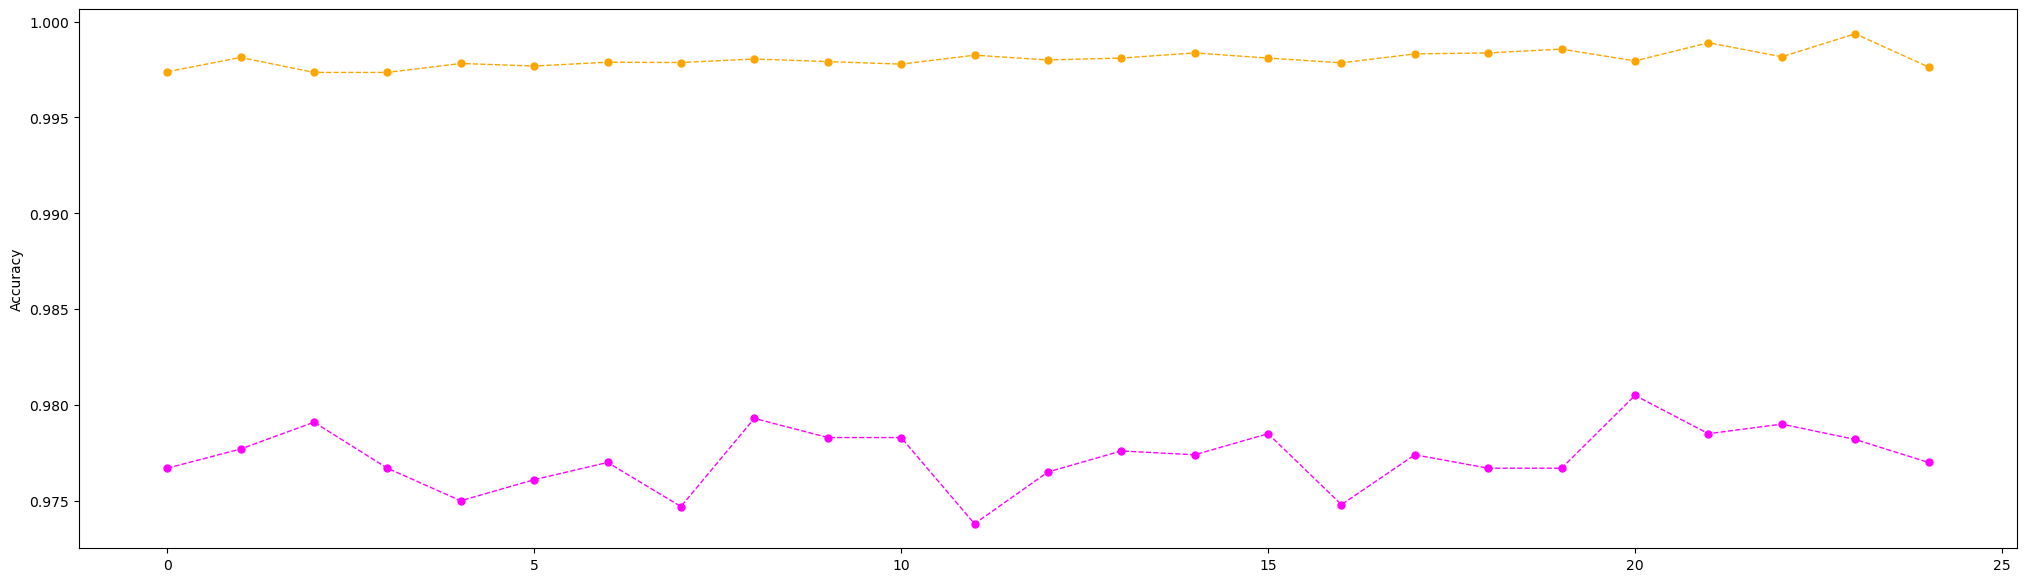

In [63]:
plt.figure(figsize = (25 , 7))
plt.plot(history.history['accuracy'] , color='orange', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)    # Training Accuracy
plt.plot(history.history['val_accuracy'] , color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5) # Testing Accuracy
plt.ylabel('Accuracy')
plt.show()

#### Insights : Accuracy is always closure to 1 is very good model and Loss(Error) is closure to 0 is very good model

#### Visualisation of Loss (Training Error) and val Loss (Testing Error)

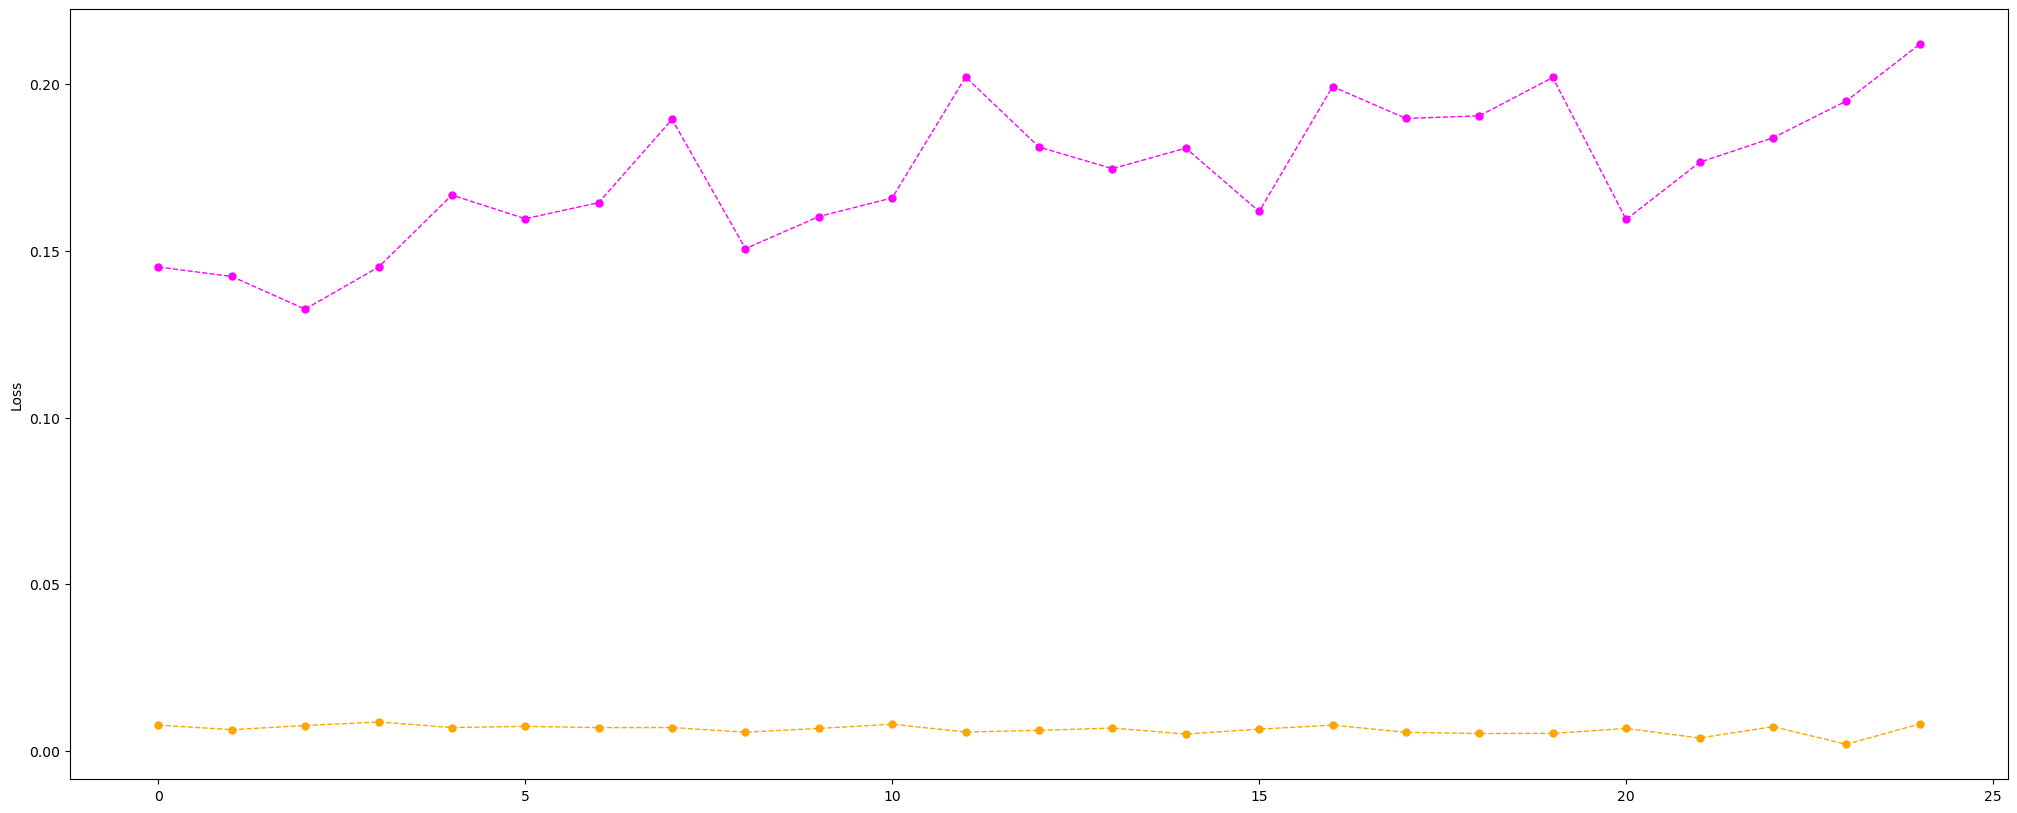

In [68]:
plt.figure(figsize = (25 , 10))
plt.plot(history.history['loss'],color='orange', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)   # Loss (Training Error)
plt.plot(history.history['val_loss'],color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)    # val Loss (Testing Error)
plt.ylabel('Loss')
plt.show()

#### Here we use MLP because of pixel size is less of an image but when image data is there always use CNN . (MLP is also work on image data but MLP is computationally costly as compare to CNN) and CNN has concept of translation invariance .CNN's main aim is to recognise / detect object which is presented in image and translational variance means that object which present / locate at anywhere in image no matter about position / location of an object that should be recognised by CNN . If a moving object inside of an image then also CNN will detect / recognise that moving object thats called translational invariance . means they dont't concern about the location of object inside in image. 

##### MLP deoes not have concept of translation invariance but it use other techniques to detect the objects of an image which is not at proper position.like Data Augementation. MLP is not naturally designed to handle the objects which is moving